<a href="https://colab.research.google.com/github/impanaj07/EDA-ecommerce/blob/main/Analytix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1: IMPORTING ALL THE LIBRARIES


In [ ]:
#importing the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2:LOADING THE DATASET


In [ ]:
df=pd.read_csv('/content/data.csv',encoding='latin1')


In [ ]:
#change the columns names
df.rename(index=str, columns={'InvoiceNo': 'invoice_num',
                              'StockCode' : 'stock_code',
                              'Description' : 'description',
                              'Quantity' : 'quantity',
                              'InvoiceDate' : 'invoice_date',
                              'UnitPrice' : 'unit_price',
                              'CustomerID' : 'cust_id',
                              'Country' : 'country'}, inplace=True)

In [ ]:
#printing the first 5 row
df.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#to display the summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_num   541909 non-null  object 
 1   stock_code    541909 non-null  object 
 2   description   540455 non-null  object 
 3   quantity      541909 non-null  int64  
 4   invoice_date  541909 non-null  object 
 5   unit_price    541909 non-null  float64
 6   cust_id       406829 non-null  float64
 7   country       541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 37.2+ MB


Display basic statistics for numerical columns



In [ ]:
# Display basic statistics for numerical columns
df.describe()

,quantity,unit_price,cust_id
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#check missing values for each column
df.isnull().sum().sort_values(ascending=False)

cust_id         135080
description       1454
invoice_num          0
stock_code           0
quantity             0
invoice_date         0
unit_price           0
country              0
dtype: int64

Visualize missing values(OPTIONAL)


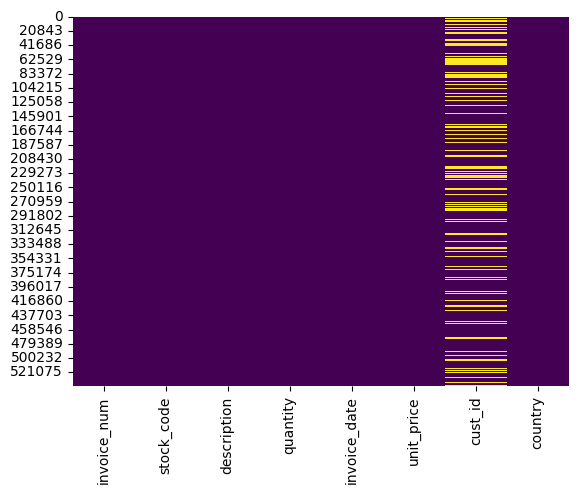

In [ ]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
#check out the rows with missing values
df[df.isnull().any(axis=1)].head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [ ]:
#for dates and categorical data the datatypes must be appropriate
# change the invoice_date format - String to Timestamp format
df['invoice_date'] = pd.to_datetime(df.invoice_date, format='%m/%d/%Y %H:%M')

In [ ]:
# change description - UPPER case to LOWER case
df['description'] = df.description.str.lower()

In [ ]:
df.head()


,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


REMOVE ROWS WITH MISSING VALUES

In [ ]:
#df_new without missing values
df_new=df.dropna()

In [ ]:
#checking missing values for each column
df_new.isnull().sum().sort_values(ascending=False)

invoice_num     0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
cust_id         0
country         0
dtype: int64

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  float64       
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
# change columns type - String to Int type
df_new['cust_id'] = df_new['cust_id'].astype('int64')

<ipython-input-96-79aaed2737ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cust_id'] = df_new['cust_id'].astype('int64')


In [ ]:
df_new.head()

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  object        
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   cust_id       406829 non-null  int64         
 7   country       406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [ ]:
df_new.describe().round(2)

,quantity,invoice_date,unit_price,cust_id
count,406829.00,406829,406829.00,406829.00
mean,12.06,2011-07-10 16:30:57.879207424,3.46,15287.69
min,-80995.00,2010-12-01 08:26:00,0.00,12346.00
25%,2.00,2011-04-06 15:02:00,1.25,13953.00
50%,5.00,2011-07-31 11:48:00,1.95,15152.00
75%,12.00,2011-10-20 13:06:00,3.75,16791.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,248.69,NaN,69.32,1713.60


In [ ]:
df_new.shape

(406829, 8)

REMOVE QUANTITY WITH NEGATIVE VALUES


In [ ]:
df_new = df_new[df_new.quantity > 0]


In [ ]:
df_new.describe().round(2)

,quantity,invoice_date,unit_price,cust_id
count,397924.00,397924,397924.00,397924.00
mean,13.02,2011-07-10 23:43:36.912475648,3.12,15294.32
min,1.00,2010-12-01 08:26:00,0.00,12346.00
25%,2.00,2011-04-07 11:12:00,1.25,13969.00
50%,6.00,2011-07-31 14:39:00,1.95,15159.00
75%,12.00,2011-10-20 14:33:00,3.75,16795.00
max,80995.00,2011-12-09 12:50:00,8142.75,18287.00
std,180.42,NaN,22.10,1713.17


Add the column - amount_spent


In [ ]:
df_new['amount_spent'] = df_new['quantity'] * df_new['unit_price']

In [ ]:
# rearrange all the columns for easy reference
df_new = df_new[['invoice_num','invoice_date','stock_code','description','quantity','unit_price','amount_spent','cust_id','country']]

INSERT the month day and hour colums

In [ ]:

df_new['year_month'] = df_new['invoice_date'].dt.strftime('%Y%m')
df_new['month'] = df_new['invoice_date'].dt.month
df_new['day'] = df_new['invoice_date'].dt.dayofweek + 1  # +1 to make Monday=1... until Sunday=7
df_new['hour'] = df_new['invoice_date'].dt.hour
unique_months = df_new['month'].unique()
print(f"Unique months in the data: {sorted(unique_months)}")
invoices_by_month = df_new.groupby('month')['invoice_num'].count()
print("Invoices by Month:")
print(invoices_by_month)

Unique months in the data: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Invoices by Month:
month
1     21232
2     19928
3     27177
4     22644
5     28322
6     27185
7     26827
8     27013
9     40030
10    49557
11    64545
12    43464
Name: invoice_num, dtype: int64


In [ ]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


Exploratory Data Analysis (EDA)


In [ ]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='invoice_num', ascending=False).head()

The TOP 5 customers with most number of orders...


,cust_id,country,invoice_num
86,12748,United Kingdom,693
1016,17841,United Kingdom,460
404,14606,United Kingdom,390
533,15311,United Kingdom,367
463,14911,EIRE,315


TOP 5 countries with most number of Orders

country
United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Name: invoice_num, dtype: int64


<Figure size 200x200 with 0 Axes>

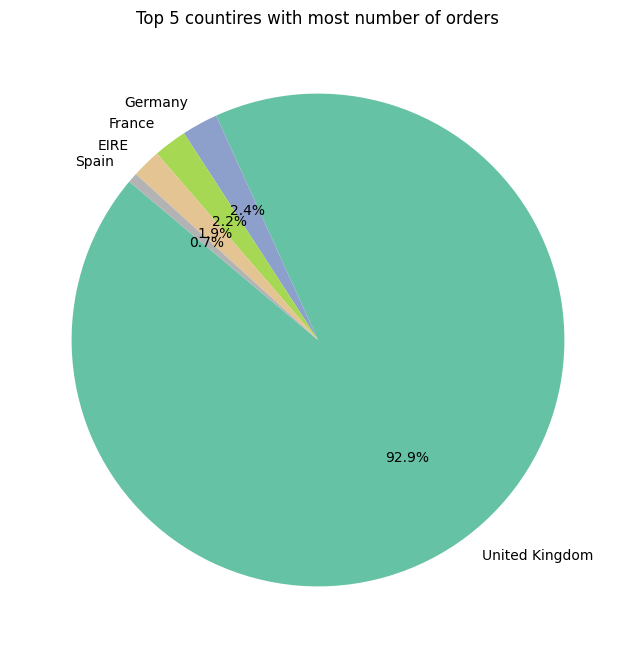

In [ ]:
group_country_orders = df_new.groupby('country')['invoice_num'].count().sort_values(ascending=False)
top_5_countries=group_country_orders.head(5)
print(top_5_countries)
plt.figure(figsize=(2,2))
plt.subplots(figsize=(15,8))
top_5_countries.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Set2')
plt.ylabel('Country', fontsize=12)
plt.title('Top 5 countires with most number of orders', fontsize=12)
plt.ylabel('')
plt.show()



Number of Orders for different Customers

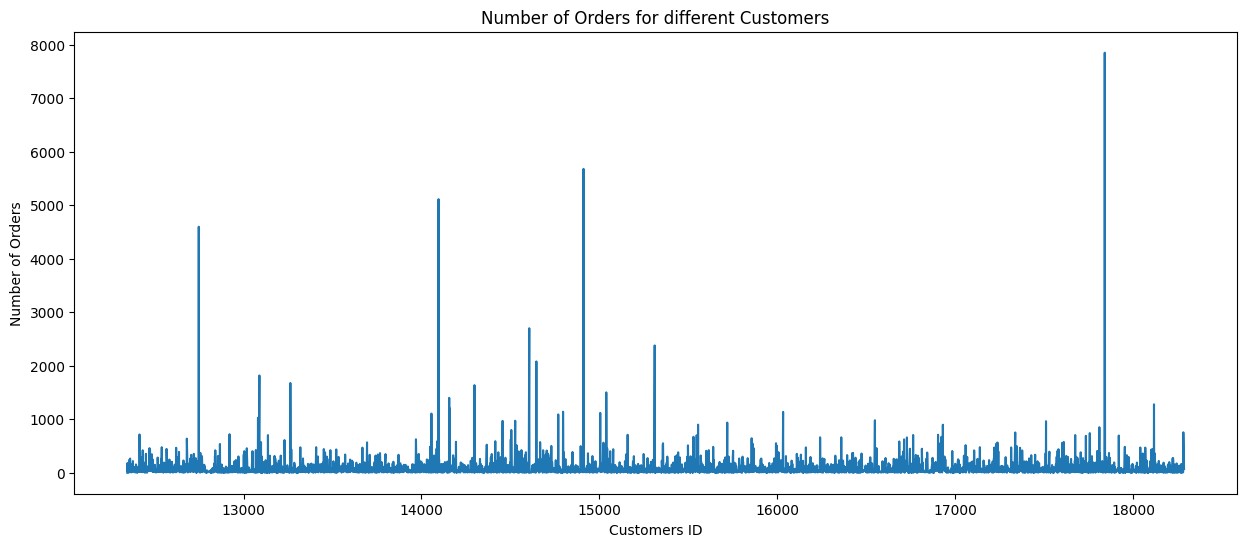

In [ ]:
orders = df_new.groupby(by=['cust_id','country'], as_index=False)['invoice_num'].count()
plt.subplots(figsize=(15,6))
plt.plot(orders.cust_id, orders.invoice_num)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()


How much money spent by the customers?


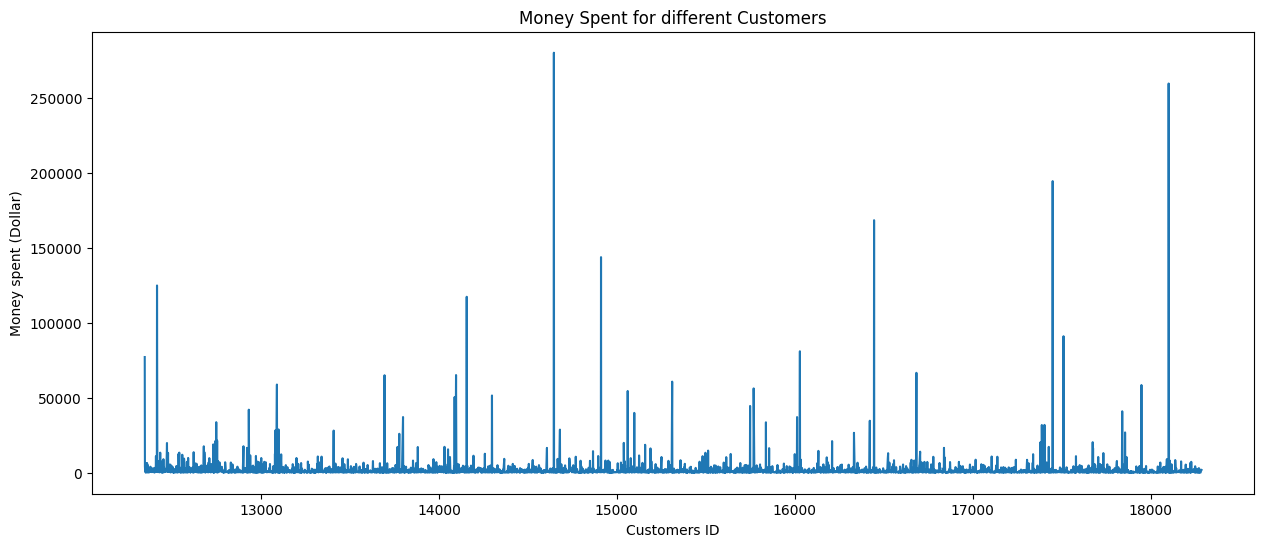

In [ ]:
money_spent = df_new.groupby(by=['cust_id','country'], as_index=False)['amount_spent'].sum()
plt.subplots(figsize=(15,6))
plt.plot(money_spent.cust_id, money_spent.amount_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

Check TOP 5 customers with highest money spent

In [ ]:
print('The TOP 5 customers with highest money spent...')
money_spent.sort_values(by='amount_spent', ascending=False).head()

The TOP 5 customers with highest money spent...


,cust_id,country,amount_spent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06


In [ ]:
df_new.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
0,536365,2010-12-01 08:26:00,201012,12,3,8,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,12,3,8,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,12,3,8,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,12,3,8,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,12,3,8,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom


NUMBER OF ORDERS FOR DIFFERENT MONTH

In [ ]:
df_new.groupby('invoice_num')['month'].unique().value_counts().sort_index()

month
[1]      987
[2]      998
[3]     1321
[4]     1149
[5]     1555
[6]     1393
[7]     1331
[8]     1281
[9]     1756
[10]    1929
[11]    2658
[12]    2178
Name: count, dtype: int64

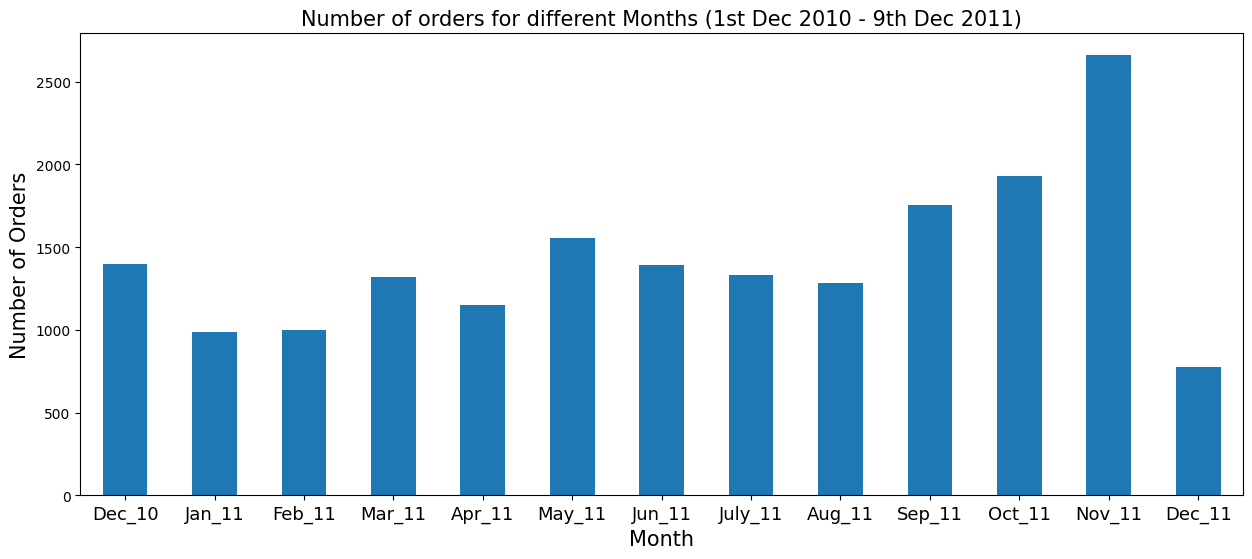

In [ ]:
ax = df_new.groupby('invoice_num')['year_month'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

NUMBER OF ORDERS FOR DIFFERENT DAY

In [ ]:
df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index()

day
[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: count, dtype: int64

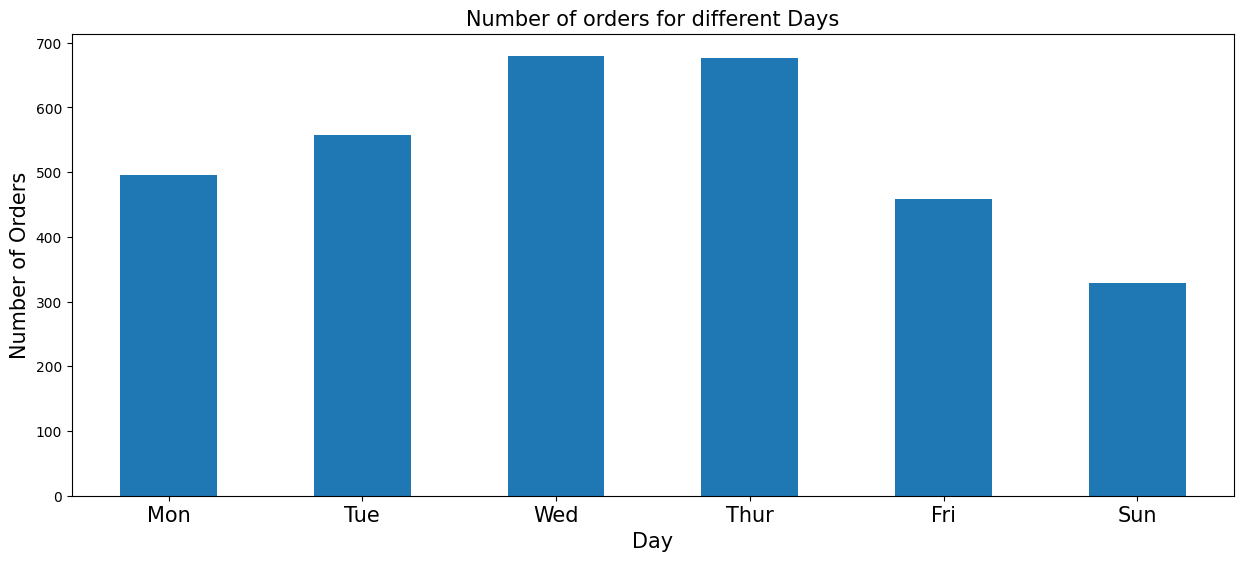

In [ ]:
ax = df_new.groupby('invoice_num')['day'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

NUMBER OF ORDERS FOR DIFFERENT HOURS

In [ ]:
df_new.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index()

hour
[7]       5
[8]      65
[9]     245
[10]    407
[11]    416
[12]    522
[13]    457
[14]    383
[15]    384
[16]    184
[17]     83
[18]     24
[19]     21
Name: count, dtype: int64

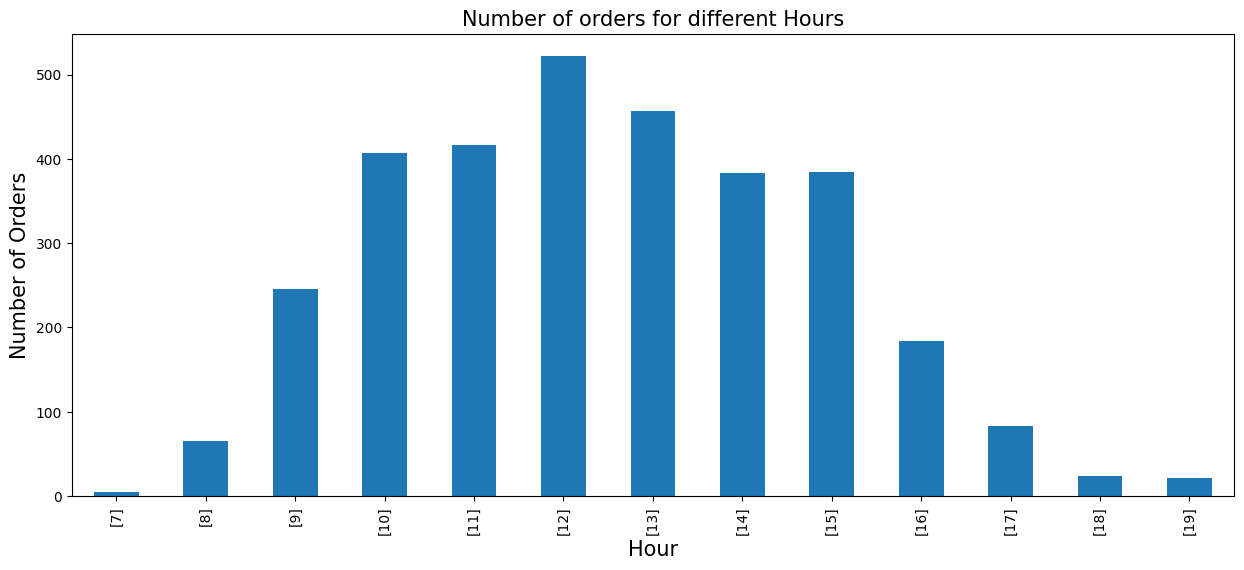

In [ ]:
ax = df_new.groupby('invoice_num')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
#ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

Discover patterns for Unit Price

In [ ]:
df_new.unit_price.describe()

count    63541.000000
mean         3.142369
std          5.240746
min          0.000000
25%          1.250000
50%          1.950000
75%          3.750000
max        320.690000
Name: unit_price, dtype: float64

DISCOVERING FREE ITEMS

In [ ]:
df_free = df_new[df_new.unit_price == 0.0]

In [ ]:
df_free.head()

,invoice_num,invoice_date,year_month,month,day,hour,stock_code,description,quantity,unit_price,amount_spent,cust_id,country
9302,537197,2010-12-05 14:02:00,201012,12,7,14,22841,round cake tin vintage green,1,0.0,0.0,12647,Germany
33576,539263,2010-12-16 14:36:00,201012,12,4,14,22580,advent calendar gingham sack,4,0.0,0.0,16560,United Kingdom
40089,539722,2010-12-21 13:45:00,201012,12,2,13,22423,regency cakestand 3 tier,10,0.0,0.0,14911,EIRE
47068,540372,2011-01-06 16:41:00,201101,1,4,16,22090,paper bunting retrospot,24,0.0,0.0,13081,United Kingdom
47070,540372,2011-01-06 16:41:00,201101,1,4,16,22553,plasters in tin skulls,24,0.0,0.0,13081,United Kingdom


LINE PLOT TO VISUALIZE THE QUANTITY OF FREE ITEMS BY DESCRIPTION

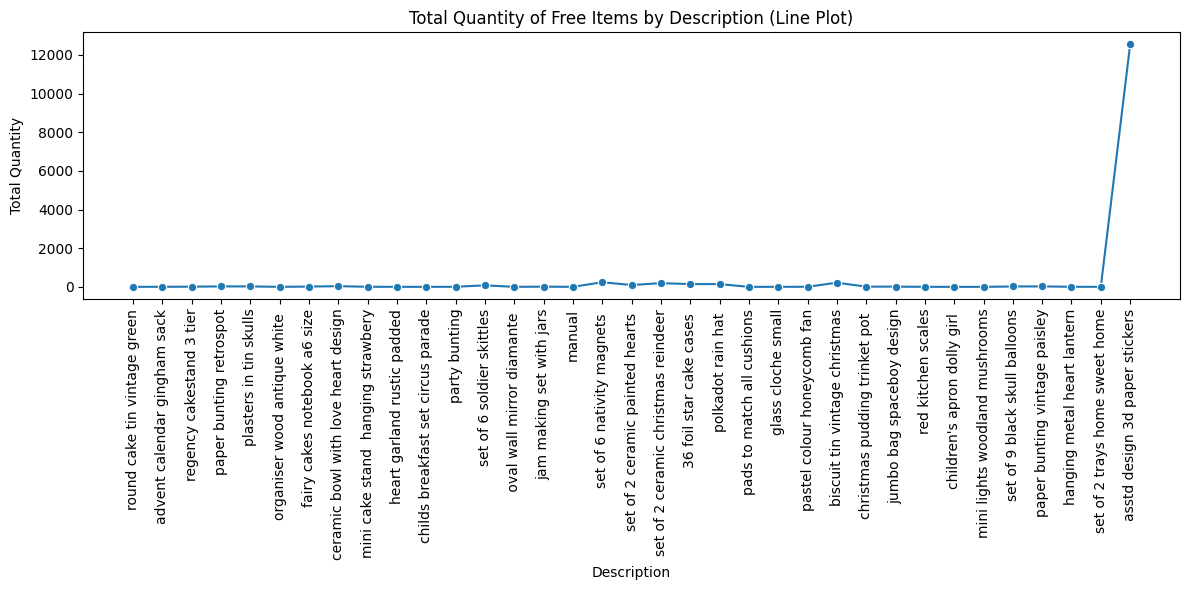

In [ ]:
#line plot to visualize the aggregated quantity of free items by description
plt.figure(figsize=(12, 6))
sns.lineplot(x="description", y="quantity", data=df_free, marker='o')
plt.xticks(rotation=90)
plt.xlabel("Description")
plt.ylabel("Total Quantity")
plt.title("Total Quantity of Free Items by Description (Line Plot)")
plt.tight_layout()
plt.show()

In [ ]:
counts=df_free.year_month.value_counts().sort_index()
counts

year_month
201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: count, dtype: int64

<ipython-input-164-c76b7369649d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index.astype(str), y=counts.values,legend=False, palette='viridis')


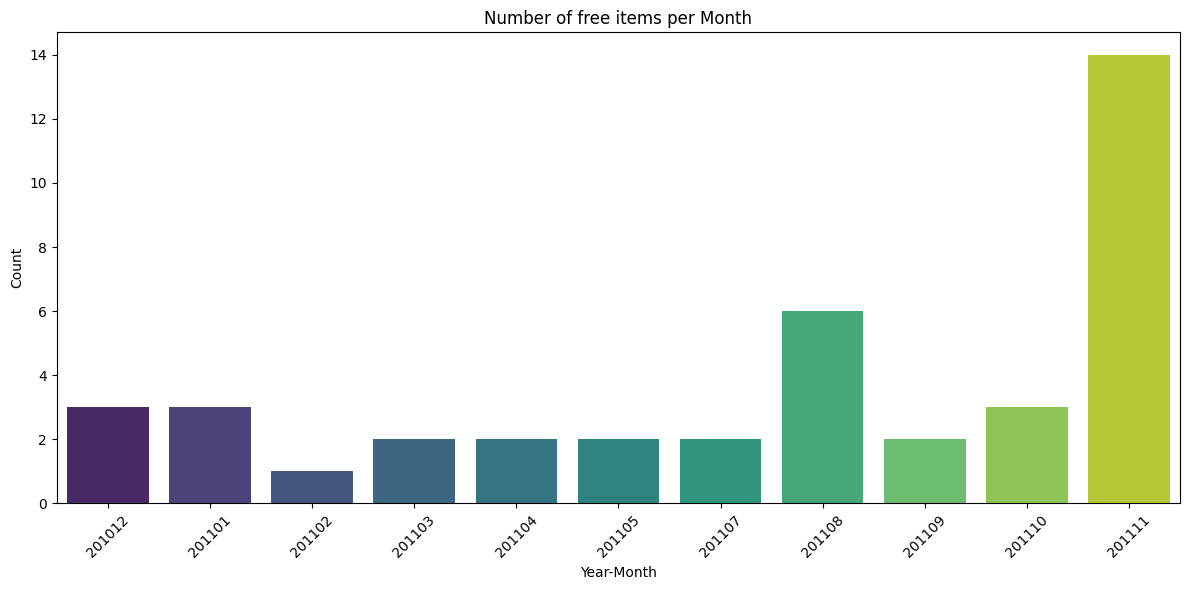

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=counts.index.astype(str), y=counts.values,legend=False, palette='viridis')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.title('Number of free items per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualize the top 5 countries that provides free items

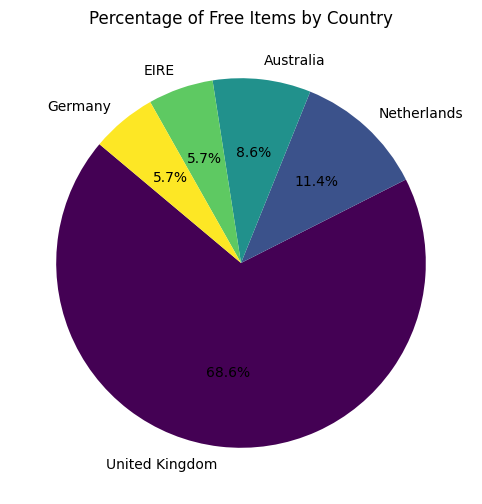

In [ ]:
free_items_by_country = df_free.groupby('country')['invoice_num'].count().sort_values(ascending=False)
top_5_countries = free_items_by_country.head(5)
plt.figure(figsize=(10, 6))
top_5_countries.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
plt.ylabel('')
plt.title('Percentage of Free Items by Country')
plt.show()

How many orders for each country?


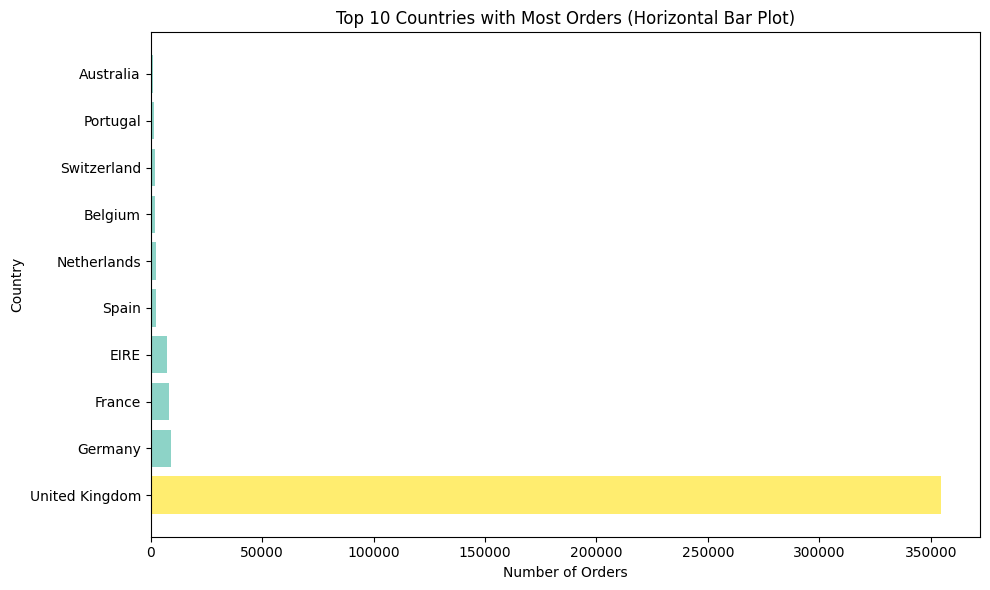

In [ ]:
top_customers = df_new.groupby('country')['invoice_num'].count().sort_values(ascending=False)
top_5_countries = top_customers.head(10)
colors = cm.Set3(top_5_countries.values / float(max(top_5_countries.values)))
plt.figure(figsize=(10, 6))
plt.barh(top_5_countries.index, top_5_countries.values, color=colors)
plt.xlabel('Number of Orders')
plt.ylabel('Country')
plt.title('Top 10 Countries with Most Orders (Horizontal Bar Plot)')
plt.tight_layout()
plt.show()

In [ ]:
df_new.head()

,invoice_num,stock_code,year_month,month,day,hour,description,quantity,invoice_date,unit_price,cust_id,country
0,536365,85123A,201012,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,201012,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,201012,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,201012,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,201012,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
df['TotalSpent'] = df['unit_price'] * df['quantity']
df

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,amount_spent,year_month,InvoiceMonth,TotalSpent
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,December,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,December,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,December,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,December,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,December,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
100242,544812,22083,paper chain kit retrospot,6,2011-02-23 15:58:00,5.79,NaN,United Kingdom,34.74,2011-02,February,34.74
100243,544812,22084,paper chain kit empire,7,2011-02-23 15:58:00,5.79,NaN,United Kingdom,40.53,2011-02,February,40.53
100244,544812,22087,paper bunting white lace,3,2011-02-23 15:58:00,5.79,NaN,United Kingdom,17.37,2011-02,February,17.37
100245,544812,22088,paper bunting coloured lace,1,2011-02-23 15:58:00,5.79,NaN,United Kingdom,5.79,2011-02,February,5.79


 Total money spent by each country (without UK)

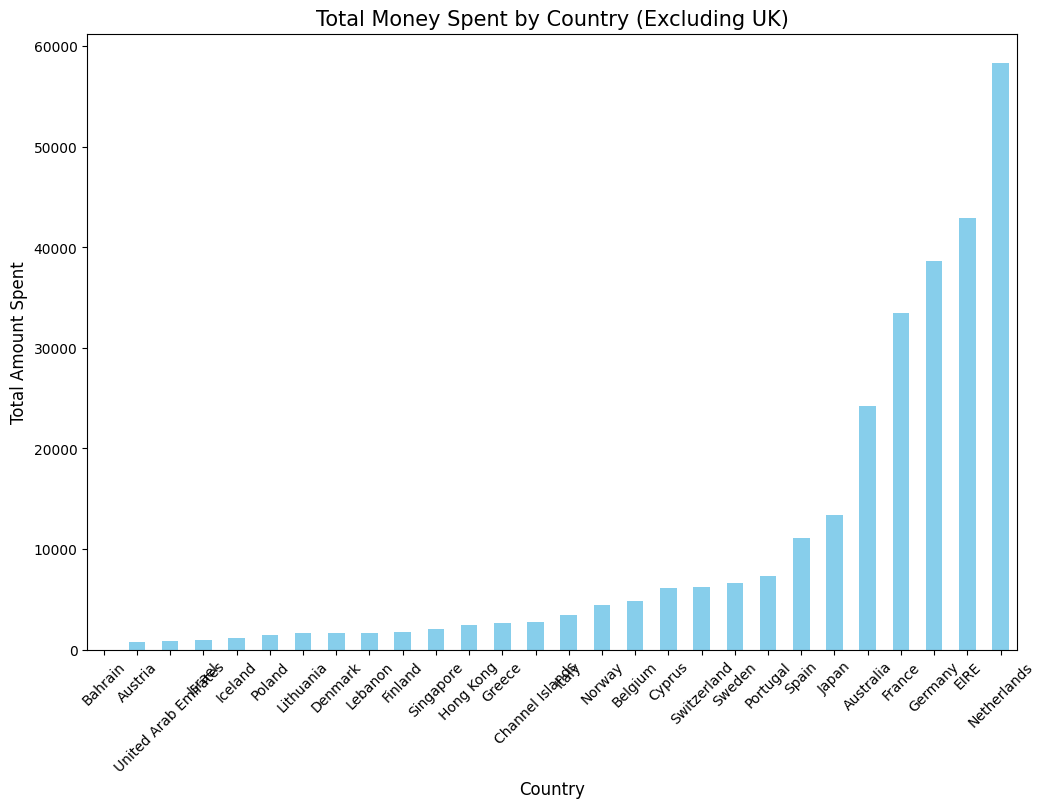

country
Bahrain                     0.00
Austria                   775.40
United Arab Emirates      889.24
Israel                    931.50
Iceland                  1187.18
Poland                   1465.43
Lithuania                1661.06
Denmark                  1680.72
Lebanon                  1693.88
Finland                  1781.82
Singapore                2053.07
Hong Kong                2439.76
Greece                   2661.24
Channel Islands          2793.32
Italy                    3407.36
Norway                   4418.02
Belgium                  4790.33
Cyprus                   6151.87
Switzerland              6217.23
Sweden                   6602.12
Portugal                 7351.88
Spain                   11115.97
Japan                   13376.08
Australia               24237.73
France                  33515.47
Germany                 38683.11
EIRE                    42909.41
Netherlands             58327.75
Name: TotalSpent, dtype: float64


In [ ]:
df_filtered = df[df['country'] != 'United Kingdom']
total_spent_per_country = df_filtered.groupby('country')['TotalSpent'].sum().sort_values()
plt.figure(figsize=(12, 8))
total_spent_per_country.plot(kind='bar', color='skyblue')
plt.title('Total Money Spent by Country (Excluding UK)', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)
plt.xticks(rotation=45)
plt.show()
print(total_spent_per_country)

FINDING OUTLIERS

In [ ]:
#finding the outliers
Q1 = df['unit_price'].quantile(0.25)
Q3 = df['unit_price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['unit_price'] < (Q1 - 1.5 * IQR)) | (df['unit_price'] > (Q3 + 1.5 * IQR))]
print(f"Number of potential outliers in UnitPrice: {len(outliers)}")

Number of potential outliers in UnitPrice: 39627


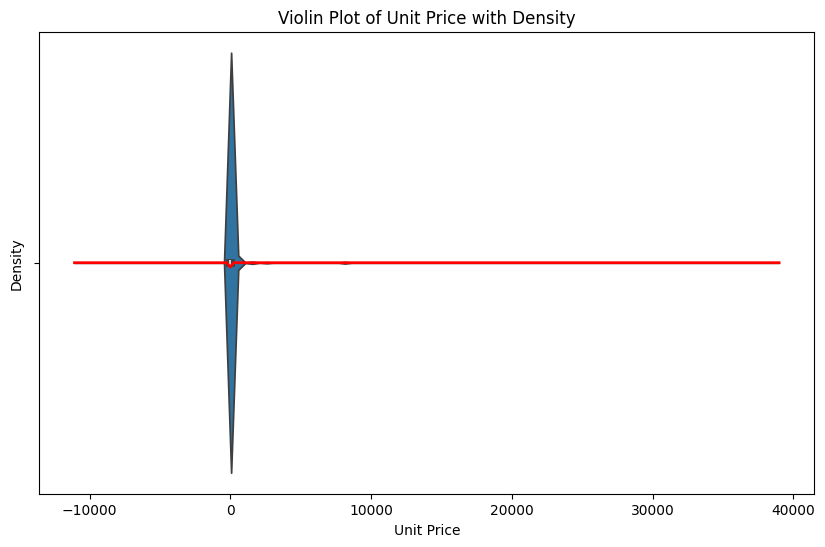

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['unit_price'])#, bw_method=0.5, density_norm='width')
sns.kdeplot(df['unit_price'], color='r', linewidth=2)
plt.title('Violin Plot of Unit Price with Density')
plt.xlabel('Unit Price')
plt.ylabel('Density')
plt.show()
#most of it is concentrated on unit price zero which indicates that most of the products are given for free

Quantity sold per price category

price_category
Low       11.181511
Medium     3.241945
High       2.951117
Luxury     1.558422
Name: quantity, dtype: float64


<ipython-input-196-1e7c9171f330>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_quantity_per_category.index, y=avg_quantity_per_category.values, palette='viridis')


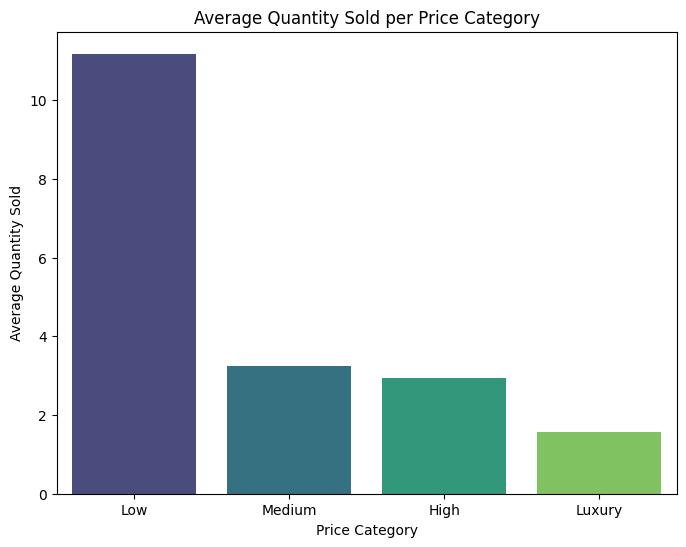

In [ ]:
# Create price bins
bins = [0, 5, 10, 15, 20]
price_categories = pd.cut(df['unit_price'], bins=bins, labels=['Low', 'Medium', 'High', 'Luxury'])
df['price_category'] = price_categories  # Add a new column for price category
# Analyze by price category (e.g., average quantity per category)
avg_quantity_per_category = df.groupby('price_category')['quantity'].mean()
print(avg_quantity_per_category)
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_quantity_per_category.index, y=avg_quantity_per_category.values, palette='viridis')
plt.title('Average Quantity Sold per Price Category')
plt.xlabel('Price Category')
plt.ylabel('Average Quantity Sold')
plt.show()


Number of unique Customers per country

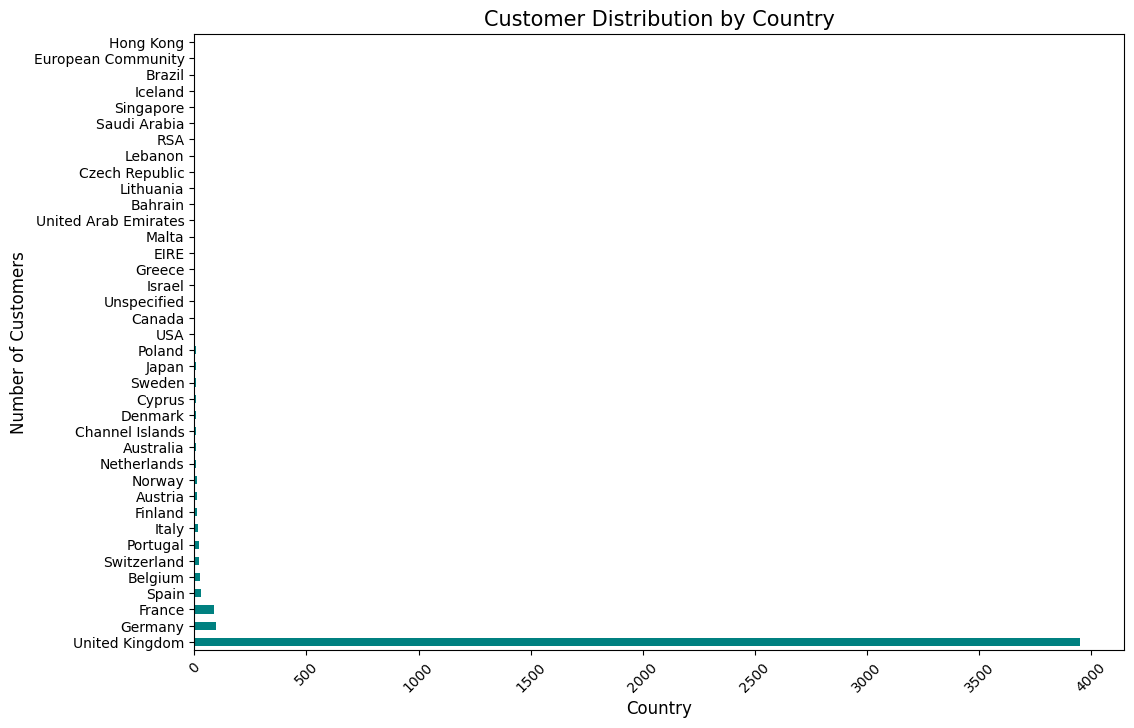

In [ ]:
# Count unique customers per country
customer_distribution = df.groupby('country')['cust_id'].nunique().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
customer_distribution.plot(kind='barh', color='teal')
plt.title('Customer Distribution by Country', fontsize=15)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45)
plt.show()

TOP 10 products by total sales


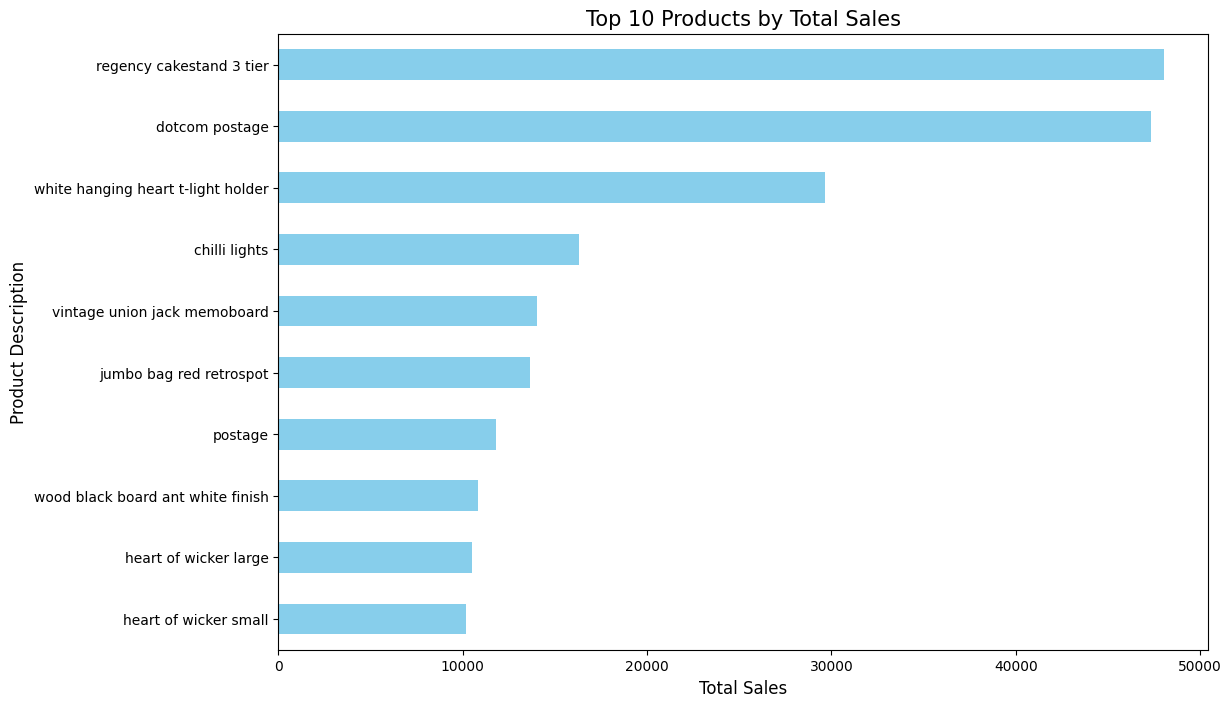

In [ ]:
df['total_sales'] = df['quantity'] * df['unit_price']
top_10_products = df.groupby('description')['total_sales'].sum().nlargest(10)
plt.figure(figsize=(12, 8))
top_10_products.plot(kind='barh', color='skyblue')
plt.title('Top 10 Products by Total Sales', fontsize=15)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Product Description', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to show highest sales on top
plt.show()